# question 1 and 2
# 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.
# 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [1]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np

In [4]:
def search_product(x):
    amazon=webdriver.Chrome(r"F:\chromedriver.exe")

    amazon.get('https://www.amazon.in/')

    product=amazon.find_element_by_xpath('//*[@id="twotabsearchtextbox"]')
    product.send_keys(x)

    search=amazon.find_element_by_xpath('//*[@id="nav-search-submit-button"]')
    search.click()
    
    Brand_Name=[]
    Product_Name=[]
    Price=[]
    Expected_Delivery=[]
    Product_URL=[]


    Product_Name_tag=amazon.find_elements_by_xpath("//span[@class='a-size-base-plus a-color-base a-text-normal']")
    for k in Product_Name_tag:
            p=k.text
            Product_Name.append(p)

    time.sleep(5)

    for k in range(len(Product_Name)):
        for j in Product_Name:
            brand=j.split(" ")
            Brand_Name.append(brand[0])

    time.sleep(5)


    Price_tag=amazon.find_elements_by_xpath("//span[@class='a-price-whole']")
    for l in Price_tag:
        p=l.text
        Price.append(p)

    time.sleep(5)

    Expected_Delivery_tag=amazon.find_elements_by_xpath("//span[@class='a-color-base a-text-bold']")
    for n in Expected_Delivery_tag:
        e=n.text
        Expected_Delivery.append(e)

    time.sleep(5)

    Product_URL_tag=amazon.find_elements_by_xpath("//a[@class='a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal']")
    for p in Product_URL_tag:
            pr=p.get_attribute('href')
            Product_URL.append(pr)

    time.sleep(5)
    amazon.close
    
    zipped = list(zip(Brand_Name[0:53],Product_Name[0:53],Price[0:53],Expected_Delivery[0:53],Product_URL[0:53]))
    
    df = pd.DataFrame(zipped, columns=['Brand Name', 'ProductName', 'Price','Expected_Delivery','Product_URL'])
        
    for col in df.columns:
        df[col] = df[col].fillna('-')
    
    df.to_csv('Data.csv')

    data=pd.read_csv("Data.csv")
    return data

In [7]:
search_product(input("ENTER THE PRODUCT YOU WANT TO SEARCH eg. GUITER \n",))

ENTER THE PRODUCT YOU WANT TO SEARCH eg. GUITER 
guitar


Unnamed: 0 Brand Name                                        ProductName  \
0            0   Medellin  Medellin 38" Acoustic Guitar Brown Carbon Fibe...   
1            1    Kadence  Kadence Frontier Jumbo Semi Acoustic Guitar Wi...   
2            2    Kadence  Kadence Frontier guitar with Online Guitar lea...   
3            3   Medellin  Medellin 38" Acoustic Guitar Carbon Fiber body...   
4            4     Juârez  Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...   
5            5     Intern  Intern INT-38C Acoustic Guitar Kit, With Bag, ...   
6            6     Juarez  Juarez Acoustic Guitar, 38 Inch Curved Body Cu...   
7            7     Fender  Fender CD 60 Dread V3 DS 6 String Acoustic Gui...   
8            8     Yamaha             Yamaha FS100C Acoustic Guitar, Natural   
9            9        NaN                                                NaN   
10          10        NaN                                                NaN   
11          11     Intern  Intern 38C Cutaway Design Black Acoustic Guita...   
12          12     Intern  Intern INT-38C Acoustic Guitar Kit, With Bag, ...   
13          13     Intern  Intern INT-38C Acoustic Guitar Kit (Sunburst) ...   
14          14     Juârez  Juârez Acoustic Guitar, 38 Inch Cutaway, JRZ38...   
15          15     Intern  Intern INT-38C-BK-G Cutaway Right Handed Acous...   
16          16     Hovner  Hovner 215 Black F-Cut Rosewood Fretboard Acou...   
17          17    Kadence  Kadence Guitar Frontier Series, Electric Acous...   
18          18     JUAREZ  JUAREZ JRZ38C Right Handed Acoustic Guitar wit...   
19          19    Kadence  Kadence Frontier guitar with Online Guitar lea...   
20          20     Intern  Intern INT-38C-SB-G Cutaway Right Handed Acous...   
21          21     Intern  Intern INT-38C Sunburst Acoustic Guitar kit wi...   
22          22     Juarez  Juarez JRZ-ST01, 6 Strings Electric Guitar, Ri...   
23          23     Intern  Intern 38C Acoustic Steel-string Guitar Premiu...   
24          24   Medellin  Medellin 38" Acoustic Guitar Carbon Fiber body...   
25          25      HOMME  HOMME STORE 4 String Guitar Children's Musical...   
26          26     Festra  Festra R-40- Trussrod Acoustic Guitar Kit with...   
27          27     Crizer  Crizer 4 String Guitar Children's Musical Inst...   
28          28      Revel  Revel 38 Inches Cutaway Design Acoustic Guitar...   
29          29     Juarez  Juarez Acoustic Guitar, [ LEFT HANDED] 38 Inch...   
30          30     Juarez  Juarez Acoustic Guitar Kit, 38 Inch Cutaway, 3...   
31          31     Intern  Intern INT-38C Acoustic Guitar Kit, With Bag, ...   
32          32     Juarez  Juarez Acoustic Guitar Kit, 38 Inch Cutaway, 3...   
33          33     Yamaha                    Yamaha Classical Guitar C40//02   
34          34   Medellin  Medellin 38" Acoustic Guitar Black Carbon Fibe...   
35          35      Vault  Vault EA20 Guitar Kit with Learn to Play Ebook...   
36          36   Medellin  Medellin 40" Blue Acoustic Guitar +(Free Onlin...   
37          37     Intern  Intern INT-38C-VT-G Cutaway Right Handed Acous...   
38          38     Fender  Fender SA 135C 39 Inch 6 String Cutaway Acoust...   
39          39   Medellin  Medellin 38" Acoustic Guitar Brown Carbon Fibe...   
40          40     JUAREZ  JUAREZ Arpéggio 104.14 cm (41 Inch) Semi-Acous...   
41          41     JUAREZ  JUAREZ Acoustic Guitar 3xE 1st String & 2 Pick...   
42          42      Heart  Heart choice 38C IN TrussRod Acoustic Guitar K...   
43          43     DEVICE  DEVICE OF URBAN INFOTECH Guitar Tuner 360 degr...   
44          44     JUAREZ  JUAREZ JRZ38CTR/BK 38 Inch Acoustic Guitar wit...   
45          45     Intern  Intern INT-38C Acoustic Guitar Kit, With Bag, ...   
46          46     Intern  Intern INT-38C-RD-G Cutaway Right Handed Acous...   
47          47     Juârez  Juârez JRZ38C/MAH 6 Strings Acoustic Guitar 38...   
48          48     Intern  Intern INT-38C Brown Acoustic Guitar kit with ...   
49  

In [ ]:
# task completed

## Question 3.Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [1]:
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time, urllib.request
import logging
import argparse
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np

In [63]:
l=['fruits','cars','Machine Learning','Guitar','Cakes']

for x in l:

    photo=webdriver.Chrome(r"F:\chromedriver.exe")

    photo.get('https://www.google.com/')

    time.sleep(5)

    images=photo.find_element_by_xpath('//*[@id="gb"]/div/div[1]/div/div[2]/a')
    images.click()

    time.sleep(10)
    
    product=photo.find_element_by_xpath('//input[@class="gLFyf gsfi"]')
    product.send_keys(x)

    time.sleep(5)
    product.send_keys(Keys.ENTER)

    # get the image source
    img = photo.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')

    image=[]

    for l,k in enumerate(img[0:10]):
        a=k.get_attribute('src')
        image.append(a) 
        # download the image
        urllib.request.urlretrieve(a,input("Enter the name for the image with .png extension",))

    photo.close()

Enter the name for the image with .png extension1.png
Enter the name for the image with .png extension2.png
Enter the name for the image with .png extension3.png
Enter the name for the image with .png extension4.png
Enter the name for the image with .png extension5.png
Enter the name for the image with .png extension6.png
Enter the name for the image with .png extension7.png
Enter the name for the image with .png extension8.png
Enter the name for the image with .png extension9.png
Enter the name for the image with .png extension10.png
Enter the name for the image with .png extension11.png
Enter the name for the image with .png extension12.png
Enter the name for the image with .png extension13.png
Enter the name for the image with .png extension14.png
Enter the name for the image with .png extension15.png
Enter the name for the image with .png extension16.png
Enter the name for the image with .png extension17.png
Enter the name for the image with .png extension18.png
Enter the name for 

In [66]:
import os
ROOT_DIR = os.path.abspath(os.curdir)
ROOT_DIR

## path of current directory

'C:\\Users\\Ravinder\\Python\\flip robo'

In [67]:
from PIL import Image
import glob
image_list = []

# reading all the images in root directory
for filename in glob.iglob(ROOT_DIR + '**/*.png', recursive=True): 
    im=Image.open(filename)
    image_list.append(im)    #creating a list of image

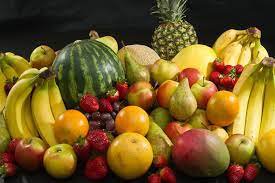

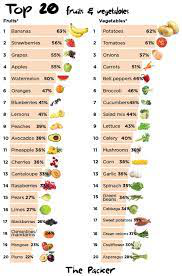

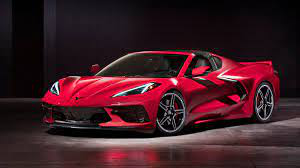

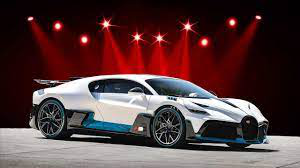

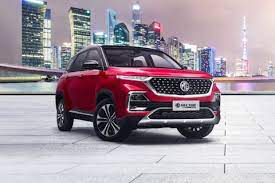

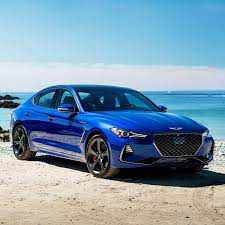

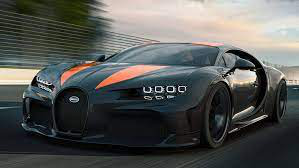

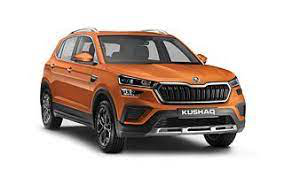

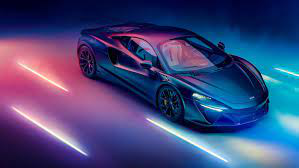

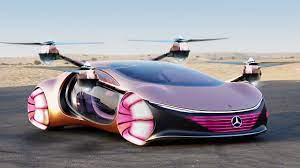

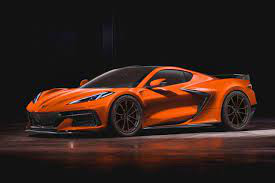

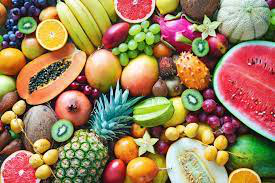

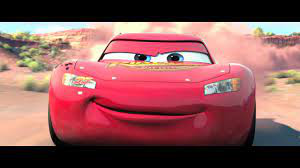

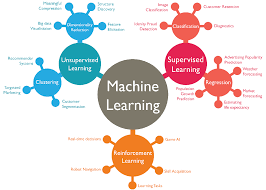

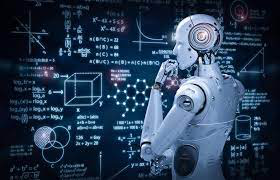

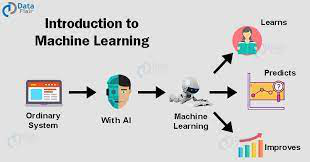

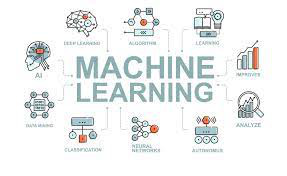

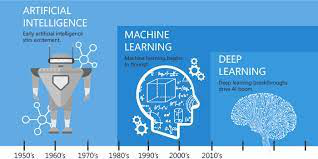

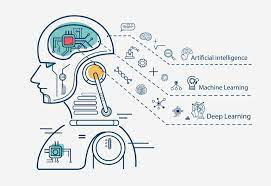

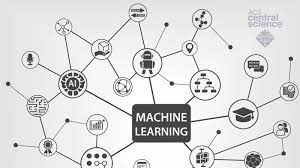

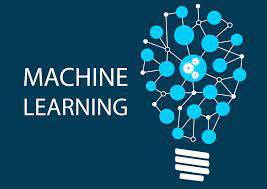

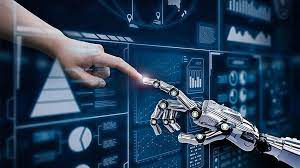

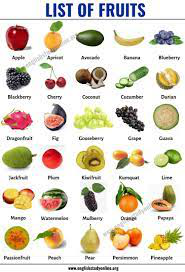

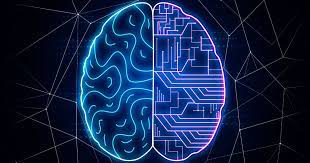

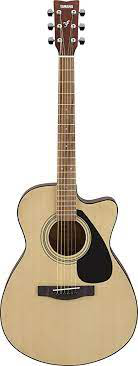

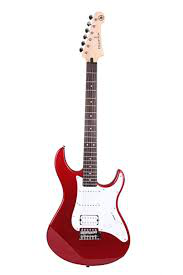

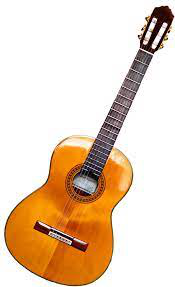

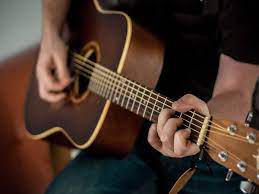

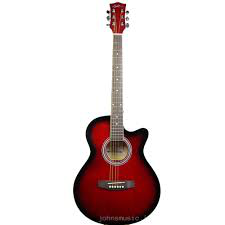

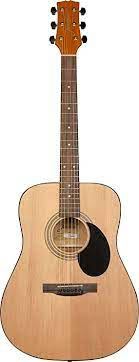

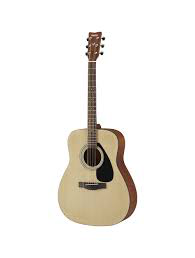

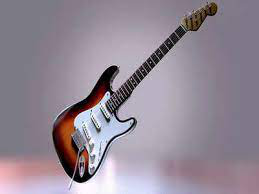

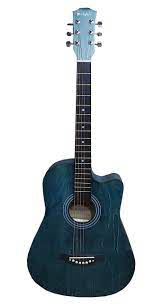

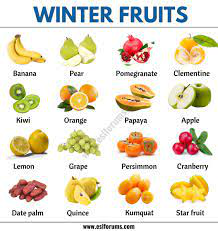

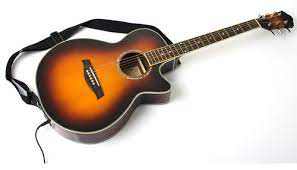

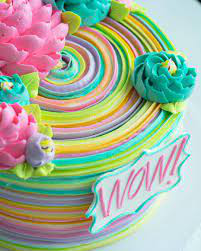

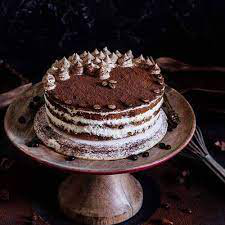

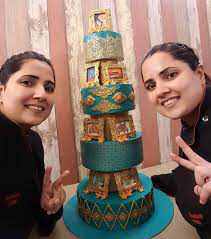

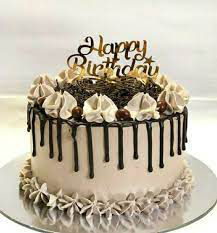

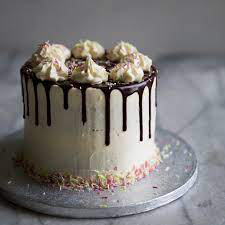

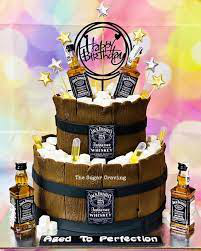

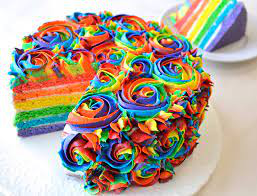

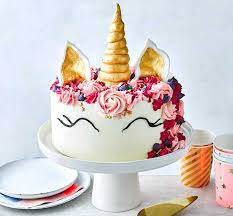

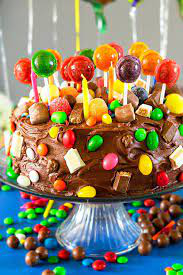

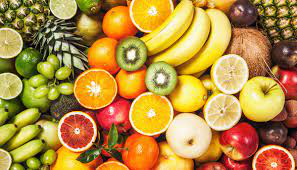

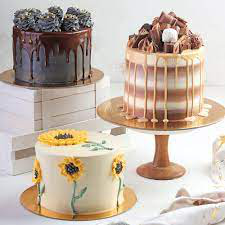

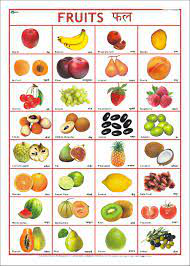

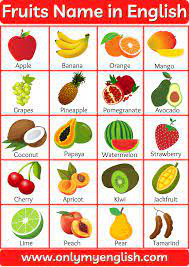

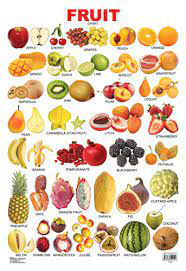

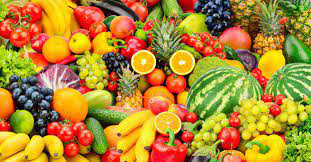

In [75]:
## showinga all the image in the image 
for x in image_list:
    display(x)

<!-- task completed -->

### Question Number 4 Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [2]:
flipkart=webdriver.Chrome(r"F:\chromedriver.exe")

flipkart.get('https://www.flipkart.com/')
    
time.sleep(10)

product=flipkart.find_element_by_xpath('//input[@class="_3704LK"]')
product.send_keys("Smartphone")

search=flipkart.find_element_by_xpath('//button[@class="L0Z3Pu"]')
search.click()
    
    
time.sleep(5)

In [3]:
Product_name=[]
Product_name_tag=flipkart.find_elements_by_xpath("//div[@class='_4rR01T']")
for k in Product_name_tag:
        p=k.text
        Product_name.append(p.split("("))
name=[]
colour=[]
for i in Product_name:
    name.append(i[0])
    colour.append(i[1].split(","))

for i in range(len (colour)):
    colour[i]=colour[i][0]


In [4]:
Product_des=[]
Product_des_tag=flipkart.find_elements_by_xpath("//div[@class='fMghEO']")
for k in Product_des_tag:
    p=k.text
    Product_des.append(p.split("\n"))
memory=[]
display=[]
camera=[]
battery=[]
processor=[]
warranty=[]
    
for i in range(len(Product_des)):
    memory.append(Product_des[i][0].split("|"))
    display.append(Product_des[i][1])
    camera.append(Product_des[i][2].split("|"))
    battery.append(Product_des[i][3])
    processor.append(Product_des[i][4])
    warranty.append(Product_des[i][5])

ram=[]
rom=[]
expandable=[]
for i in range(len(memory)):
    ram.append(memory[i][0])
    rom.append(memory[i][1])
    try:
        expandable.append(memory[i][2])
    except:
        expandable.append("-")


In [19]:
front=[]
rear=[]
for i in camera:
    front.append(i[1])
    rear.append(i[0])

In [5]:
Price=[]
Price_tag=flipkart.find_elements_by_xpath("//div[@class='col col-5-12 nlI3QM']")
for l in Price_tag:
    p=l.text
    Price.append(p.split("\n",))

In [7]:
correction=[]
for i in Price:
    k=(i[1].split(","))
    l=k[1]
    correction.append(k[0]+','+l[0:3])
    
for i in range(len(Price)):
    Price[i][1]=correction[i]
price=[]
for i in Price:
    price.append(i[0:2])

In [10]:
Url=[]
Url_tag=flipkart.find_elements_by_xpath("//img[@class='_396cs4 _3exPp9']")
for l in Url_tag:
    p=l.get_attribute('src')
    Url.append(p.split("\n",))

In [11]:
Url

[['https://rukminim1.flixcart.com/image/312/312/ku4ezrk0/mobile/p/e/4/c31-mzb0a0jin-poco-original-imag7bzqxgdhgf2n.jpeg?q=70'],
 ['https://rukminim1.flixcart.com/image/312/312/l0tweq80/mobile/w/r/t/-original-imagcgtgwg5taegn.jpeg?q=70'],
 ['https://rukminim1.flixcart.com/image/312/312/ku04o7k0/mobile/m/w/p/9i-sport-mzb0a0yin-redmi-original-imag785ryfspqg3a.jpeg?q=70'],
 ['https://rukminim1.flixcart.com/image/312/312/l3dcl8w0/mobile/c/q/t/-original-imageg2rjgezh6yf.jpeg?q=70'],
 ['https://rukminim1.flixcart.com/image/312/312/l0tweq80/mobile/d/d/s/-original-imagcgtgyqebxqhx.jpeg?q=70'],
 ['https://rukminim1.flixcart.com/image/312/312/l3dcl8w0/mobile/j/o/x/-original-imagehxy5hzshkdv.jpeg?q=70'],
 ['https://rukminim1.flixcart.com/image/312/312/l0tweq80/mobile/x/f/u/-original-imagcgtghym8theg.jpeg?q=70'],
 ['https://rukminim1.flixcart.com/image/312/312/ku04o7k0/mobile/p/8/u/9i-sport-mzb0a5iin-redmi-original-imag785qegs5ghyy.jpeg?q=70'],
 ['https://rukminim1.flixcart.com/image/312/312/ku4ezr

In [22]:
zipp= list(zip(name,colour,display,ram,rom,expandable,front,rear,battery,processor,price,Url))

df= pd.DataFrame(zipp, columns=['Smartphone name','Colour','Display Size','RAM','Storage(ROM)','Hard-disk','Secondary Camera','Primary Camera','Battery Capacity',"Processor",'Price','Product URL'])
    
df.to_csv('smartphone.csv')

data=pd.read_csv('smartphone.csv')

In [23]:
data

Unnamed: 0       Smartphone name           Colour  \
0            0             POCO C31        Royal Blue   
1            1             REDMI 10      Pacific Blue   
2            2       REDMI 9i Sport       Coral Green   
3            3  Infinix HOT 12 Play    Daylight Green   
4            4             REDMI 10   Caribbean Green   
5            5  Infinix HOT 12 Play      Horizon Blue   
6            6             REDMI 10    Midnight Black   
7            7       REDMI 9i Sport      Carbon Black   
8            8             POCO C31       Shadow Gray   
9            9  Infinix HOT 12 Play      Racing Black   
10          10             POCO C31        Royal Blue   
11          11             POCO C31       Shadow Gray   
12          12     realme Narzo 50i      Carbon Black   
13          13     realme Narzo 50i        Mint Green   
14          14    REDMI Note 10T 5G    Graphite Black   
15          15    REDMI Note 10T 5G     Metallic Blue   
16          16     realme Narzo 50i      Carbon Black   
17          17    REDMI Note 10T 5G        Mint Green   
18          18          OPPO K10 5G    Midnight Black   
19          19       REDMI 9i Sport     Metallic Blue   
20          20    REDMI Note 10T 5G    Chromium White   
21          21          vivo T1 44W          Ice Dawn   
22          22          vivo T1 44W          Ice Dawn   
23          23          OPPO K10 5G        Ocean Blue   

                                    Display Size        RAM  Storage(ROM)  \
0               16.59 cm (6.53 inch) HD+ Display  4 GB RAM     64 GB ROM    
1                17.02 cm (6.7 inch) HD+ Display  4 GB RAM     64 GB ROM    
2               16.59 cm (6.53 inch) HD+ Display  4 GB RAM     64 GB ROM    
3               17.32 cm (6.82 inch) HD+ Display  4 GB RAM     64 GB ROM    
4                17.02 cm (6.7 inch) HD+ Display  4 GB RAM     64 GB ROM    
5               17.32 cm (6.82 inch) HD+ Display  4 GB RAM     64 GB ROM    
6                17.02 cm (6.7 inch) HD+ Display  4 GB RAM     64 GB ROM    
7               16.59 cm (6.53 inch) HD+ Display  4 GB RAM     64 GB ROM    
8               16.59 cm (6.53 inch) HD+ Display  4 GB RAM     64 GB ROM    
9               17.32 cm (6.82 inch) HD+ Display  4 GB RAM     64 GB ROM    
10              16.59 cm (6.53 inch) HD+ Display  3 GB RAM     32 GB ROM    
11              16.59 cm (6.53 inch) HD+ Display  3 GB RAM     32 GB ROM    
12                   16.51 cm (6.5 inch) Display  2 GB RAM     32 GB ROM    
13                   16.51 cm (6.5 inch) Display  2 GB RAM     32 GB ROM    
14         16.66 cm (6.56 inch) Full HD+ Display  6 GB RAM     128 GB ROM   
15         16.66 cm (6.56 inch) Full HD+ Display  6 GB RAM     128 GB ROM   
16                   16.51 cm (6.5 inch) Display  4 GB RAM     64 GB ROM    
17         16.66 cm (6.56 inch) Full HD+ Display  4 GB RAM      64 GB ROM   
18              16.66 cm (6.56 inch) HD+ Display  8 GB RAM    128 GB ROM    
19              16.59 cm (6.53 inch) HD+ Display  4 GB RAM     64 GB ROM    
20         16.66 cm (6.56 inch) Full HD+ Display  6 GB RAM     128 GB ROM   
21  16.36 cm (6.44 inch) Full HD+ AMOLED Display  4 GB RAM    128 GB ROM    
22  16.36 cm (6.44 inch) Full HD+ AMOLED Display  6 GB RAM    128 GB ROM    
23              16.66 cm (6.56 inch) HD+ Display  8 GB RAM    128 GB ROM    

                  Hard-disk    Secondary Camera  \
0    Expandable Upto 512 GB    5MP Front Camera   
1      Expandable Upto 1 TB    5MP Front Camera   
2    Expandable Upto 512 GB    5MP Front Camera   
3    Expandable Upto 256 GB    8MP Front Camera   
4      Expandable Upto 1 TB    5MP Front Camera   
5    Expandable Upto 256 GB    8MP Front Camera   
6      Expandable Upto 1 TB    5MP Front Camera   
7    Expandable Upto 512 GB    5MP Front Camera   
8    Expandable Upto 512 GB    5MP Front Camera   
9    Expandable Upto 256 GB    8MP Front Camera   
10   Expandable Upto 512 GB    5MP Front Camera   
11   Expandable Upto 512 GB    5MP Front

In [ ]:
# task completed

# Question number 5 Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [4]:
!pip install geopy
from geopy.geocoders import Nominatim

def geospatical(x):
    # Initialize Nominatim API
    geolocator = Nominatim(user_agent="MyApp")

    location = geolocator.geocode(x)

    print("The latitude of the location is: ", location.latitude)
    print("The longitude of the location is: ", location.longitude)
    
geospatical(input("ENTER THE CITY",))

ENTER THE CITYdelhi
The latitude of the location is:  28.6517178
The longitude of the location is:  77.2219388


In [ ]:
#task completed

# Question 6
# Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in.

In [34]:
from bs4 import BeautifulSoup
import requests

In [35]:
start_url = "https://trak.in/india-startup-funding-investment-2015/"
page_response = requests.get(start_url)
page_response.status_code # code 200 means connecition was sucessful and it is now active

200

In [36]:
fund = BeautifulSoup(page_response.content, 'html.parser')
data_urls = [start_url]

for h3_tag in fund.find_all(name="h3"):
    data_urls.append(h3_tag.find(name='a').get('href'))

data_urls[:5]

['https://trak.in/india-startup-funding-investment-2015/',
 'https://trak.in/indian-startup-funding-and-investment-chart-january-2018/',
 'https://trak.in/indian-startup-funding-and-investment-chart-february-2018/',
 'https://trak.in/indian-startup-funding-and-investment-chart-march-2018/',
 'https://trak.in/indian-startup-funding-investment-chart-april-2018/']

In [37]:
data_urls[0]

'https://trak.in/india-startup-funding-investment-2015/'

In [38]:
new_row_list = []
column_name = ['Sr. No.', 'Date (dd/mm/yyyy)', 'Startup Name', 'Industry/ Vertical', 'Sub-Vertical', 'City / Location', 'Investors’ Name', 'Investment Type', 'Amount (in USD)']

urls_count = 1

html_response = requests.get(data_urls[0])
html_response.status_code
soup = BeautifulSoup(html_response.content, 'html.parser')
class_list = []
for element in soup.find_all(class_=True):
    class_list.extend(element["class"])
class_list = [cls for cls in class_list if 'tablepress-id-' in cls] 
 
if len(class_list) < 1:
    skip_first_row = True
    class_list.append(None)
    for class_ in class_list:
        tbl=soup.find(name='table') #, class_=class_)

        n_rows = 0
        for tr in tbl.find_all('tr'):
            if skip_first_row == True:
                skip_first_row = False
                continue
            new_row = {}
            for col_id, td in enumerate(tr.find_all('td')):
                if col_id < len(column_name):
                    new_row[column_name[col_id]] = td.text
            if not new_row == {}:
                n_rows += 1
                new_row_list.append(new_row)
            #print("class_list-old:", class_, len(new_row_list), n_rows, url)
else:
    for class_ in class_list:
        tbl=soup.find(name='table', class_=class_)

        n_rows = 0
        for tr in tbl.find_all('tr'):
            new_row = {}
            for col_id, td in enumerate(tr.find_all('td')):
                if col_id < len(column_name):
                    new_row[column_name[col_id]] = td.text
            if not new_row == {}:
                n_rows += 1
                new_row_list.append(new_row)
            #print("class_list-new :", class_, len(new_row_list), n_rows, url)

data = pd.DataFrame(new_row_list, columns=column_name)
print("Data shape :", data.shape)

Data shape : (616, 9)


In [40]:
data

Unnamed: 0  Sr. No. Date (dd/mm/yyyy)            Startup Name  \
0            5        1        04/03/2021               DealShare   
1            6        2        31/03/2021                Uniphore   
2            7        3        30/03/2021                   Dunzo   
3            8        4        30/03/2021                  BYJU’S   
4            9        5        23/03/2021             SkilloVilla   
5           10        6        25/03/2021                CityMall   
6           11        7        26/03/2021                   DotPe   
7           12        1        11/02/2021                Doubtnut   
8           13        2        22/02/2021                  Zomato   
9           14        3        19/02/2021               Fingerlix   
10          15        4        17/02/2021                   Zolve   
11          16        5        15/02/2021               KreditBee   
12          17        6        12/02/2021               Pepperfry   
13          18        7        12/02/2021                 Grofers   
14          19        8        09/02/2021                 Nothing   
15          20        9        09/02/2021             SplashLearn   
16          21        1        15/01/2021         Digit Insurance   
17          22        2        28/01/2021  Bombay Shaving Company   
18          23        3        19/01/2021                  DeHaat   
19          24        4        19/01/2021               Darwinbox   
20          25        5        18/01/2021                   mfine   
21          26        6        18/01/2021                   Udayy   
22          27        7        11/01/2021           True Elements   
23          28        8        13/01/2021                   Saveo   

        Industry/ Vertical                                       Sub-Vertical  \
0               E-commerce                           Online shopping platform   
1               Technology            Conversational Service Automation (CSA)   
2               E-commerce                           Hyper-local delivery app   
3                 Edu-tech                                    Online tutoring   
4                 Edu-tech                Career and job-oriented upskilling.   
5               E-commerce       Social ecommerce and online grocery platform   
6                  FinTech  Commerce and payments platform to offline ente...   
7                 Edu Tech                                E-Learning Platform   
8              Hospitality                      Online Food Delivery Platform   
9              Hospitality                      Semi-cooked food delivery app   
10                 FinTech                             Global Neobank Venture   
11                 Finance                           Digital lending platform   
12              E-commerce                        Multi-brand furniture brand   
13              E-Commerce                                 Online supermarket   
14              Technology                        Consumer Technology Venture   
15                  EdTech                      Game-based learning programme   
16      Financial Services                                 Insurance Services   
17  Consumer Goods Company      Shave care, beard care, and skincare products   
18        AgriTech Startup  online marketplace for farm products and services   
19                    SaaS                                            HR Tech   
20     Health Tech Startup                 AI-powered telemedicine mobile app   
21                  EdTech     Online learning platform for kids in class 1-5   
22            Food Startup                      Whole Food plant based Nashta   
23          B2B E-commerce                                         Pharmacies   

      City / Location                                    Investors’ Name  \
0   Jaipur, Rajasthan                                    Innoven Capital   
1           Palo Alto                          Sorenson Capital Partners   
2           Bengaluru   

In [ ]:
# task completed

# Question 7 Write a program to scrap all the available details of best gaming laptops from digit.in.

In [42]:
start_url = "https://www.digit.in/top-products/best-gaming-laptops-40.html"
page_response = requests.get(start_url)
page_response.status_code # code 200 means connecition was sucessful and it is now active

200

In [47]:
soup = BeautifulSoup(page_response.content, 'html.parser')
seller=[]
for i in soup.find_all('table',id="summtable"):
    seller.append(i.text)  
seller

['\n\n\nProduct Name\nSeller\nPrice\n\n\n\n\nMSI Raider GE76\n\nAmazon\n\n\n₹ 429,940\n\n\n\nASUS ROG Strix Scar 15\n\nAmazon\n\n\n₹ 280,990\n\n\n\nAcer Nitro 5\n\nN/A\n\n\n₹ 129,990\n\n\n\nMSI Stealth 15M\n\nN/A\n\n\n₹ 134,990\n\n\n\nASUS ROG Strix Scar 15\n\nCroma\n\n\n₹ 193,990\n\n\n\nASUS ROG Strix Scar 15\n\nN/A\n\n\nN/A\n\n\n\nASUS ZEPHYRUS G14\n\nCroma\n\n\n₹ 144,990\n\n\n\nHP Omen 16\n\nAmazon\n\n\n₹ 145,500\n\n\n\nASUS ROG ZEPHYRUS DUO 15\n\nAmazon\n\n\n₹ 185,000\n\n\n\nAcer Aspire 7 gaming laptop\n\nCroma\n\n\n₹ 53,490\n\n\n\n']

In [50]:
a=seller[0]

In [52]:
a=a.split("\n")

In [55]:
k=0
for i in a:
    print(k,i)
    k=k+1

0 
1 
2 
3 Product Name
4 Seller
5 Price
6 
7 
8 
9 
10 MSI Raider GE76
11 
12 Amazon
13 
14 
15 ₹ 429,940
16 
17 
18 
19 ASUS ROG Strix Scar 15
20 
21 Amazon
22 
23 
24 ₹ 280,990
25 
26 
27 
28 Acer Nitro 5
29 
30 N/A
31 
32 
33 ₹ 129,990
34 
35 
36 
37 MSI Stealth 15M
38 
39 N/A
40 
41 
42 ₹ 134,990
43 
44 
45 
46 ASUS ROG Strix Scar 15
47 
48 Croma
49 
50 
51 ₹ 193,990
52 
53 
54 
55 ASUS ROG Strix Scar 15
56 
57 N/A
58 
59 
60 N/A
61 
62 
63 
64 ASUS ZEPHYRUS G14
65 
66 Croma
67 
68 
69 ₹ 144,990
70 
71 
72 
73 HP Omen 16
74 
75 Amazon
76 
77 
78 ₹ 145,500
79 
80 
81 
82 ASUS ROG ZEPHYRUS DUO 15
83 
84 Amazon
85 
86 
87 ₹ 185,000
88 
89 
90 
91 Acer Aspire 7 gaming laptop
92 
93 Croma
94 
95 
96 ₹ 53,490
97 
98 
99 
100 


In [79]:
l=[3,4,5,10,12,15,19,21,24,28,30,33,37,39,42,46,48,51,55,57,60,64,66,69,73,75,78,82,84,87,91,93,96]
data=[]
for index in l:
    data.append(a[index])

In [80]:
data=np.reshape(data,(11,3))

In [81]:
data

array([['Product Name', 'Seller', 'Price'],
       ['MSI Raider GE76', 'Amazon', '₹ 429,940'],
       ['ASUS ROG Strix Scar 15', 'Amazon', '₹ 280,990'],
       ['Acer Nitro 5', 'N/A', '₹ 129,990'],
       ['MSI Stealth 15M', 'N/A', '₹ 134,990'],
       ['ASUS ROG Strix Scar 15', 'Croma', '₹ 193,990'],
       ['ASUS ROG Strix Scar 15', 'N/A', 'N/A'],
       ['ASUS ZEPHYRUS G14', 'Croma', '₹ 144,990'],
       ['HP Omen 16', 'Amazon', '₹ 145,500'],
       ['ASUS ROG ZEPHYRUS DUO 15', 'Amazon', '₹ 185,000'],
       ['Acer Aspire 7 gaming laptop', 'Croma', '₹ 53,490']], dtype='<U27')

In [84]:
df = pd.DataFrame(data, columns=['Product Name', 'Seller', 'Price'])
df.to_csv('laptop.csv')

lappy=pd.read_csv("laptop.csv")
lappy

Unnamed: 0                 Product Name  Seller      Price
0            0                 Product Name  Seller      Price
1            1              MSI Raider GE76  Amazon  ₹ 429,940
2            2       ASUS ROG Strix Scar 15  Amazon  ₹ 280,990
3            3                 Acer Nitro 5     NaN  ₹ 129,990
4            4              MSI Stealth 15M     NaN  ₹ 134,990
5            5       ASUS ROG Strix Scar 15   Croma  ₹ 193,990
6            6       ASUS ROG Strix Scar 15     NaN        NaN
7            7            ASUS ZEPHYRUS G14   Croma  ₹ 144,990
8            8                   HP Omen 16  Amazon  ₹ 145,500
9            9     ASUS ROG ZEPHYRUS DUO 15  Amazon  ₹ 185,000
10          10  Acer Aspire 7 gaming laptop   Croma   ₹ 53,490

In [ ]:
# task completed

# Question 8 Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [36]:
import selenium
import pandas as pd
from selenium import webdriver
import time

In [37]:
# loading driver
scrap=webdriver.Chrome(r"F:\chromedriver.exe")

# requesting url
scrap.get('https://www.forbes.com/billionaires/')

time.sleep(5)   # pause


In [66]:

#empty list to hold name
person_Name=[]

person_Name_tag=scrap.find_elements_by_xpath("//div[@class='personName']")
for k in person_Name_tag:
        p=k.text
        person_Name.append(p)
        
time.sleep(5) # pause

Net_worth=[]
#empty list to net worth

Net_worth_tag=scrap.find_elements_by_xpath("//div[@class='netWorth']")
for k in Net_worth_tag:
        p=k.text
        Net_worth.append(p)
        
time.sleep(5) 

Age=[]
#empty list to hold age

Age_tag=scrap.find_elements_by_xpath("//div[@class='age']")
for k in Age_tag:
        p=k.text
        Age.append(p)
        
time.sleep(5) 

Country=[]
#empty list to hold Country

Country_tag=scrap.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
for k in Country_tag:
        p=k.text
        Country.append(p)
time.sleep(5) 

Source=[]
#empty list to hold Source of income

Source_tag=scrap.find_elements_by_xpath("//div[@class='expand-row__icon-container']")
for k in Source_tag:
        p=k.text
        Source.append(p)
        
time.sleep(5)     

industry=[]
#empty list to hold industry

industry_tag=scrap.find_elements_by_xpath("//div[@class='category']")
for k in industry_tag:
    Industry= k.get_attribute('innerHTML')
    Industry_content=Industry.strip()
    industry.append(Industry_content.split("<span")[0])
    industry.append(p)
    
feild=[]
#empty list to hold industry
for i in range(0,400,2):
    feild.append(industry[i])
    
#cleaning the data
for i in range(len(feild)):
    feild[i]=feild[i].replace("<div>", " ")
    feild[i]=feild[i].replace("&amp;","&")
 
    # closing driver
scrap.close
    
zipped = list(zip(person_Name[0:200],Net_worth[0:200],Age[0:200],Country[0:200],Source[0:200],feild[0:200]))

zipped

[('Elon Musk',
  '$219 B',
  '50',
  'United States',
  'Tesla, SpaceX',
  ' Automotive '),
 ('Jeff Bezos', '$171 B', '58', 'United States', 'Amazon', ' Technology '),
 ('Bernard Arnault & family',
  '$158 B',
  '73',
  'France',
  'LVMH',
  ' Fashion & Retail '),
 ('Bill Gates', '$129 B', '66', 'United States', 'Microsoft', ' Technology '),
 ('Warren Buffett',
  '$118 B',
  '91',
  'United States',
  'Berkshire Hathaway',
  ' Finance & Investments '),
 ('Larry Page', '$111 B', '49', 'United States', 'Google', ' Technology '),
 ('Sergey Brin', '$107 B', '48', 'United States', 'Google', ' Technology '),
 ('Larry Ellison',
  '$106 B',
  '77',
  'United States',
  'software',
  ' Technology '),
 ('Steve Ballmer',
  '$91.4 B',
  '66',
  'United States',
  'Microsoft',
  ' Technology '),
 ('Mukesh Ambani', '$90.7 B', '64', 'India', 'diversified', ' Diversified '),
 ('Gautam Adani & family',
  '$90 B',
  '59',
  'India',
  'infrastructure, commodities',
  ' Diversified '),
 ('Michael Bloombe

In [67]:
#creating the Data-Frame
df = pd.DataFrame(zipped, columns=['Millionaire', 'Worth', 'Age','Country','Brand',"Industry"])
           
df.to_csv('Millionaire.csv')

data=pd.read_csv("Millionaire.csv")

data

Unnamed: 0               Millionaire    Worth   Age        Country  \
0             0                 Elon Musk   $219 B  50.0  United States   
1             1                Jeff Bezos   $171 B  58.0  United States   
2             2  Bernard Arnault & family   $158 B  73.0         France   
3             3                Bill Gates   $129 B  66.0  United States   
4             4            Warren Buffett   $118 B  91.0  United States   
..          ...                       ...      ...   ...            ...   
195         195    Marcel Herrmann Telles  $10.3 B  72.0         Brazil   
196         196                Leon Black    $10 B  70.0  United States   
197         197                Joe Gebbia    $10 B  40.0  United States   
198         198              David Geffen    $10 B  79.0  United States   
199         199                Yu Renrong    $10 B  56.0          China   

                     Brand                 Industry  
0            Tesla, SpaceX              Automotive   
1                   Amazon              Technology   
2                     LVMH        Fashion & Retail   
3                Microsoft              Technology   
4       Berkshire Hathaway   Finance & Investments   
..                     ...                      ...  
195                   beer         Food & Beverage   
196         private equity   Finance & Investments   
197                 Airbnb              Technology   
198  movies, record labels   Media & Entertainment   
199         semiconductors           Manufacturing   

[200 rows x 7 columns]

In [ ]:
# task completed

# Question 9 Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [34]:
#!pip install webdriver-manager
from selenium import webdriver
from webdriver_manager.firefox import GeckoDriverManager
from bs4 import BeautifulSoup
import time
import pandas as pd


def ScrapComment(url):
    option = webdriver.FirefoxOptions()
    option.add_argument("--headless")
    driver = webdriver.Firefox(executable_path=GeckoDriverManager().install(), options=option)
    driver.get(url)
    prev_h = 0
    while True:
        height = driver.execute_script("""function getActualHeight() {
                    return Math.max(
                        Math.max(document.body.scrollHeight, document.documentElement.scrollHeight),
                        Math.max(document.body.offsetHeight, document.documentElement.offsetHeight),
                        Math.max(document.body.clientHeight, document.documentElement.clientHeight)
                    );
                }
                return getActualHeight();
            """)
        driver.execute_script(f"window.scrollTo({prev_h},{prev_h + 200})")
        # fix the time sleep value according to your network connection
        time.sleep(1)
        prev_h +=200  
        if prev_h >= height:
            break
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()

    comment_div = soup.select("#content #content-text")
    comment_list = [x.text for x in comment_div]
    
    time_list=[]
    for i in soup.find_all('a',class_="yt-simple-endpoint style-scope yt-formatted-string"):
        time_list.append(i.text)
    time_list=time_list[50::]
    
    upvote=[]
    for i in soup.find_all('span',class_="style-scope ytd-comment-action-buttons-renderer"):
        upvote.append(i.text)
    
    for x in range(len(upvote)):
        upvote[x]=upvote[x].replace("\n", " ")
        
    data=list(zip(comment_list[0:500],time_list[0:500],upvote[0:500]))
              
    df= pd.DataFrame(data, columns=['Comment', 'Time', 'Upvote'])
    
    df.to_csv('youtube.csv')

if __name__ == "__main__":

    urls = [
        'https://www.youtube.com/watch?v=7QEW_F_dGTk'
    ]
    ScrapComment(urls[0])

[WDM] - ====== WebDriver manager ======
[WDM] - Current firefox version is 101.0
[WDM] - Get LATEST geckodriver version for 101.0 firefox
[WDM] - Driver [C:\Users\Ravinder\.wdm\drivers\geckodriver\win64\v0.31.0\geckodriver.exe] found in cache


In [35]:
youtube=pd.read_csv("youtube.csv")
youtube

Unnamed: 0                                            Comment  \
0             0         The most profound moments in Anime history   
1             1  The moments when you first see how strong the ...   
2             2  "If you cry only when ur beaten up then nothin...   
3             3  Sasuke: I can summon snake\nObito: I can summo...   
4             4  Pain: This world shall know pain \nNaruto: You...   
..          ...                                                ...   
495         495                              Narutoo boi is too op   
496         496                           whatnaruto movie is this   
497         497                                      Too many cuts   
498         498  مانحبش نروح المول بزاف باش تكون صديقة لازم الا...   
499         499  this is edited super weird. you included scene...   

                      Time        Upvote  
0             5 months ago       1.1K     
1    5 months ago (edited)       1.1K     
2             6 months ago        694     
3             3 months ago        694     
4              3 weeks ago        484     
..                     ...           ...  
495  6 months ago (edited)          0     
496           2 months ago          0     
497           3 months ago          0     
498           3 months ago          0     
499             2 days ago          0     

[500 rows x 4 columns]

In [ ]:
# task completed

# # Question 10
# Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [33]:
from selenium import webdriver
from webdriver_manager.firefox import GeckoDriverManager
from bs4 import BeautifulSoup
import time
import pandas as pd


def Scrap(url):
    option = webdriver.FirefoxOptions()
    option.add_argument("--headless")
    driver = webdriver.Firefox(executable_path=GeckoDriverManager().install(), options=option)
    driver.get(url)

    soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()

    comment_div = soup.select("#search")
    comment_list = [x.text for x in comment_div]
    
    name=[]
    for i in soup.find_all('h2',class_="title title-6"):
        name.append(i.text)
    
    distance_list=[]
    for i in soup.find_all('div',class_="subtitle body-3"):
        distance_list.append(i.text)
        
    rating=[]
    for i in soup.find_all('div',class_="rating rating-summary-container big"):
        rating.append(i.text.replace("\n"," ")[0:8])
    
    review=[]
    for i in soup.find_all('div',class_="reviews"):
        review.append(i.text)
    
    overall_review=[]
    for i in soup.find_all('div',class_="keyword"):
        overall_review.append(i.text)
    
    privates=[]
    for i in soup.find_all('div',class_="price-col"):
        privates.append(i.text.replace("\n",""))
        
    private=[]
    for i in range(0,15,2):
        private.append(privates[i])
    dorms=[]
    for i in range(1,16,2):
        dorms.append(privates[i])

    facilites=[]
    for i in soup.find_all('div',class_="rating-factors prop-card-tablet rating-factors small"):
        facilites.append(i.text)
    
    data=list(zip(name,distance_list,rating,review,private,dorms,facilites,overall_review))
              
    df= pd.DataFrame(data, columns=["Hostel","Distance","Rating","Review","Private_Rooms","Dorms","Facilites","Overall_Review"])
    
    df.to_csv('Hostel.csv')
    
    Hostel=pd.read_csv("Hostel.csv")
    
    return Hostel
    
urls = ['https://www.hostelworld.com/s?q=London,%20England&country=England&city=London&type=city&id=3&from=2022-06-29&to=2022-07-02&guests=2&HostelNumber=&page=1']
Scrap(urls[0])

[WDM] - ====== WebDriver manager ======
[WDM] - Current firefox version is 101.0
[WDM] - Get LATEST geckodriver version for 101.0 firefox
[WDM] - Driver [C:\Users\Ravinder\.wdm\drivers\geckodriver\win64\v0.31.0\geckodriver.exe] found in cache


Unnamed: 0                                    Hostel  \
0           0              Wombat's City Hostel London    
1           1        Safestay London Elephant & Castle    
2           2                       No.8 Seven Sisters    
3           3  Safestay London Kensington Holland Park    
4           4                  Saint James Backpackers    
5           5                            Elmwood Hotel    
6           6                           Colliers Hotel    
7           7   Best Western Boltons London Kensington    

                                      Distance    Rating               Review  \
0  Hostel - 3.6km from city centre Show on Map     9.1    13722 Total Reviews   
1  Hostel - 1.7km from city centre Show on Map     7.0     4345 Total Reviews   
2    Hostel - 9km from city centre Show on Map     6.5     3789 Total Reviews   
3  Hostel - 5.9km from city centre Show on Map     6.5     1235 Total Reviews   
4  Hostel - 5.5km from city centre Show on Map     6.9     1806 Total Reviews   
5   Hotel - 3.2km from city centre Show on Map     6.1      116 Total Reviews   
6   Hotel - 2.1km from city centre Show on Map     7.4        5 Total Reviews   
7   Hotel - 5.4km from city centre Show on Map   No Rati      2 Total Reviews   

                                       Private_Rooms  \
0  Privates From Rs19973.04            Rs14980   ...   
1                    No Privates Available             
2                    No Privates Available             
3                    No Privates Available             
4                    No Privates Available             
5       Privates From             Rs30458              
6       Privates From             Rs34691              
7       Privates From             Rs27254              

                                               Dorms  \
0                                 No Dorms Available   
1           Dorms From             Rs9551              
2           Dorms From             Rs1855              
3           Dorms From             Rs4242              
4  Dorms From Rs9169.59            Rs8711              
5                                 No Dorms Available   
6                                 No Dorms Available   
7                                 No Dorms Available   

                                           Facilites Overall_Review  
0     Perfect Location    Superb Staff    Fantast...         Superb  
1     Wonderful Location    Brilliant Staff    Aw...      Very Good  
2                Great Location    Marvellous Staff            Good  
3             Wonderful Location    Brilliant Staff            Good  
4              Perfect Location    Marvellous Staff            Good  
5           Perfect Location     Awesome Cleanliness           Good  
6     Perfect Location    Superb Staff    Excelle...      Very Good  
7                                                         No Rating

In [ ]:
# assignment completed